In [1]:
%load_ext autoreload
%autoreload 2
%pip -q install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import torch
from torch import optim

from models import DRQNetwork
from behaviorcloning import clone_behavior

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cloned_policy_path = "./cloned_policy"

policy_net = DRQNetwork(
    state_size=42,
    action_size=7,
    hidden_size=512,
    num_recurrent_layers=2,
).to(device)

optimizer = optim.AdamW(
    policy_net.parameters(),
    lr=1e-4,
    weight_decay=1e-2
)

losses = clone_behavior(policy_net, optimizer, device, num_episodes=3000)

episode=0, loss=1.919115424156189
episode=20, loss=1.170523762702942
episode=40, loss=1.190576434135437
episode=60, loss=1.3315179347991943
episode=80, loss=0.8152183890342712
episode=100, loss=1.174739956855774
episode=120, loss=1.2944716215133667
episode=140, loss=0.9419782757759094
episode=160, loss=1.4346814155578613
episode=180, loss=0.8511075973510742
episode=200, loss=1.161872386932373
episode=220, loss=1.1221222877502441
episode=240, loss=0.7783682346343994
episode=260, loss=0.9337800145149231
episode=280, loss=1.6355754137039185
episode=300, loss=0.7492914199829102
episode=320, loss=0.8605883717536926
episode=340, loss=0.7634100914001465
episode=360, loss=0.8531774282455444
episode=380, loss=1.231258749961853
episode=400, loss=0.9807126522064209
episode=420, loss=0.8817135691642761
episode=440, loss=1.0709501504898071
episode=460, loss=0.967166006565094
episode=480, loss=0.9470942616462708
episode=500, loss=0.8873160481452942
episode=520, loss=0.9801461100578308
episode=540, l

Text(0, 0.5, 'Training loss')

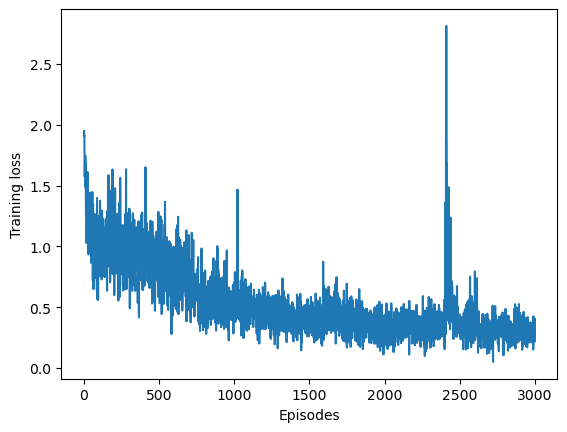

In [4]:
fig, ax = plt.subplots()
ax.plot(losses)
ax.set_xlabel("Episodes")
ax.set_ylabel("Training loss")

In [5]:
policy_net.save(cloned_policy_path)

Model saved to ./cloned_policy
